< How to Save and Restore the model >
=================================================
Deep Neural Network - Restore
----------------------

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)
import matplotlib.pylab as plt

import sys, os
sys.path.append(os.pardir)

from mnist import load_mnist

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classes = 10
batch_size = 100

x = tf.placeholder('float', [None, 784], name = 'x_')
y = tf.placeholder('float', name = 'y_')

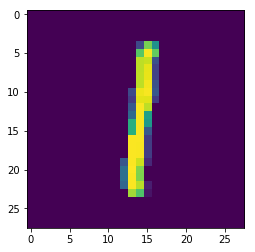

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

a=x_train[5500]
aa = a.reshape(28,28)
plt.imshow(aa)
plt.show()

x = x_train[5500]
x = x.reshape(-1,784)
x = tf.cast(x, 'float')

In [4]:
hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1]), name = 'w1'),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]), name = 'b1')}

hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2]), name = 'w2'),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]), name = 'b2')}

hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3]), name = 'w3'),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]), name = 'b3')}

output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes]), name = 'w4'),
                    'biases':tf.Variable(tf.random_normal([n_classes]), name = 'b4')}

In [5]:
save_path = 'pyhelp/'
model_name = 'sy'
if not os.path.exists(save_path):
    os.makedirs(save_path)
save_path_full = os.path.join(save_path, model_name)

sess= tf.Session()
saver = tf.train.Saver()
saver = tf.train.import_meta_graph('/Users/moonsooyoung/Desktop/pyhelp/pyhelp/sy.meta')
saver.restore(sess,save_path_full)

INFO:tensorflow:Restoring parameters from pyhelp/sy


In [6]:
l1 = tf.add(tf.matmul(x,hidden_1_layer['weights']), hidden_1_layer['biases'],name = 'l1_')
l1 = tf.nn.relu(l1, name = 'l1')

l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'],name = 'l2_')
l2 = tf.nn.relu(l2, name = 'l2')

l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'],name = 'l3_')
l3 = tf.nn.relu(l3, name = 'l3')

output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

In [7]:
print('*****************************************')
print(sess.run(output))
print('=========================================')
print(sess.run(tf.argmax(output,1)))

*****************************************
[[ -5425075.       10510584.       -1175049.875    -1985677.125
    -942181.75     -1102140.625    -3021251.25      1881475.25
    1560218.625       69987.09375]]
[1]
